In [3]:
from lib.my_initialization import *
from lib import *  
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt, numpy as np
from mpltools import annotation
import random,scipy
import matplotlib as mpl #for colorbar
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import CloughTocher2DInterpolator
from scipy import stats
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import warnings
warnings.simplefilter("ignore", UserWarning)
# import cupy as cp
np.random.seed(42)
# cp.random.seed(42)

In [4]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

In [5]:
#initialising a list filled with some number
print ( len([1j]*11) ) # List of 11 imaginary units
print ( len([0.]*1000) ) # List of 1000 0's
#merging dictionaries
x = { 'a': 1, 'b': 2 }
y = { 'b': 3, 'c': 4 }
z = { **x, **y }
print_dict ( z )
#reversing a string
name = "George"
print ( name[::-1] )
#find the most frequent element in a list
test = [ 4, 2, 2, 3, 1, 4, ]
print ( max ( set ( test ), key = test.count ) )

11
1000
a=1
b=3
c=4
egroeG
2


# define module

# make plot showing alinear controls annihilation rate exponent

In [6]:
#load birth death rates from the full model
data_folder=f'{nb_dir}/data'
os.chdir(data_folder)

data_fk_fn='full_results/data_fig4_vidmar_fk_tt.csv'
data_lr_fn='full_results/data_fig4_vidmar_lr_tt.csv'

fk=pd.read_csv(data_fk_fn)
fk['N']=fk['No2']*2
fk['q']=fk['N']/fk['A'] #number of tips per square centimeter
fk['w']=fk['rate']/fk['A']*10**3 #Hz/cm^2

lr=pd.read_csv(data_lr_fn)
lr['N']=lr['No2']*2
lr['q']=lr['N']/lr['A'] #number of tips per square centimeter
lr['w']=lr['rate']/lr['A']*10**3 #Hz/cm^2

In [222]:
# input_fn=f"{nb_dir}/data/osg_output/run_15_all_powerlaw_fits.csv" #works for many parameter settings (L=10)
input_fn=f"{nb_dir}/data/osg_output/run_36_all_powerlaw_fits.csv" #works for many parameter settings (L=10) #<<<currently in Letter

# input_fn=f"{nb_dir}/data/osg_output/run_18_all_powerlaw_fits.csv"
# input_fn=f"{nb_dir}/data/osg_output/run_17_all_powerlaw_fits.csv"

df=pd.read_csv(input_fn)
df.head()

,m,Delta_m,M,Delta_M,Rsq,rmse,rmse_full,model_name_full,q_min,q_max,...,x0,L,force_code,neighbor,reflect,set_second,no_repulsion,no_attraction,dt,Dt
0,1.349679,0.010370,13.434597,0.450906,0.998833,0.167037,1.331512,lr_ncbc,0.2,1.0,...,0,10,2,1,0,0,0,0,0.00001,0.00001
1,1.315633,0.009114,29.623555,1.037075,0.999052,0.302669,8.207356,lr_pbc,0.2,1.0,...,0,10,2,0,0,0,0,0,0.00001,0.00001
2,2.278979,0.016037,10.499396,0.375723,0.999021,0.133246,1.295868,fk_ncbc,0.2,1.0,...,0,10,2,0,0,0,0,0,0.00001,0.00001
3,1.312670,0.009886,24.288864,0.878485,0.998879,0.271535,5.133728,lr_pbc,0.2,1.0,...,0,10,2,1,0,0,0,0,0.00001,0.00001
4,1.540110,0.011923,15.689108,0.583398,0.998816,0.212951,0.436469,lr_ncbc,0.2,1.0,...,0,10,2,0,0,0,0,0,0.00001,0.00001


In [235]:
D_set_values = df.D.drop_duplicates().values
print(f"{D_set_values=}")

D_set_values=array([0.115, 0.42 ])


In [224]:
#FK model
r=0.135 # 0.1
kappa=167 # 500#250
D=0.115 # 0.7
death_rate_versus_alinear_dir=f'{nb_dir}/data/full_results/data_fig4_tymura_increasing_alinear_run_36_FK.pkl'

# #LR model
# r=0.155
# kappa=300
# D=0.420
# death_rate_versus_alinear_dir=f'{nb_dir}/data/full_results/data_fig4_tymura_increasing_alinear_run_36_LR.pkl'


# varkappa_lst=sorted(set(df['varkappa'].values))
# varkappa_lst

#TODO: extract xy values for kappa, r, D fixed to any value, which I can change later
#query for old figure 4
#define constant parameters
reflect=0
force_code=2
set_second=0
neighbor=0
no_attraction=0
no_repulsion=0
reflect=0
# kappa=100
L=10

#template query for the DataFrame
query =(df.set_second==set_second)
query&=(df.no_repulsion==no_repulsion)&(df.no_attraction==no_attraction)
query&=(df.neighbor==neighbor)&(df.force_code==force_code)
query&=(df.reflect==reflect)
query&=df.r==r
query&=df.kappa==kappa
query&=df.D==D
query&=df.L==L
# query&=df.x0==x0
query_template=query.copy()
sum(query)

23

# build minimum dataset from best fits cached for either of the full models at either of the length scales

In [236]:
kwargs = dict(data_fk_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_fk_tt.csv',
              data_lr_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_lr_tt.csv',
             min_num_particles=9)

In [237]:
# latest_run_num=29
# run_num_lst = list(reversed(list(np.arange(14,latest_run_num+1))))
# # run_num_lst=[25,17]
# # run_num_lst=[25,19]
# # run_num_lst=[25,24]
# # run_num_lst = list(np.arange(12,26))
# # run_num_lst = list(np.arange(26,14))
# run_num_lst=[25,18]
# # run_num_lst=[28,18]
# run_num_lst=[28,29]
# # run_num_lst=[25,29]
# # run_num_lst=[32,29]
# run_num_lst=[32,29]
# #note 31==30...
# # run_num_lst=[32,33]  
run_num_lst=[34,33]  

run_num_lst=[28,29]  #what was in Particle_Paper at some point


use_filterby_neighbor=False
# use_filterby_neighbor=True
neighbor=0
neighbor=1

use_filterby_minN=True
# use_filterby_minN=False
minN=9
# minN=20
# minN=50
# minN=70
# minN=90
use_filterby_amax=True
min_amax=1.

use_select_rxn=True
use_select_rxn=False
# r_trgt_lr=0.195
# kappa_trgt_lr=200
# r_trgt_fk=0.135
# kappa_trgt_fk=167.02
# kappa_trgt_fk=200
r_trgt_lr=0.155
kappa_trgt_lr=300
r_trgt_fk=0.135
kappa_trgt_fk=167.02

use_filterby_r=True
# use_filterby_r=False
# rinf=0.195 #cm
# rinf=0.15 #cm
rinf=0.1 #cm
rsupa=0.5 #cm


# neighbor=1
remove_no_diffusion=True
use_filterby_D=True
Dinf=0.1 #cm^2/s
Dsupa=0.5 #cm^2/s
# Dinf=0
# Dinf=0.01
# run_num=25 #L=5 cm
# run_num=18 #L=10 cm
num_digits_round_amax=3
gmin_fk_lst=[]
gmin_lr_lst=[]
log_dir_fk_lst=[]
log_dir_lr_lst=[]
dict_results_fk_lst=[]
dict_results_lr_lst=[]
# for run_num in [25,18]: #chosen exemplar pair
for run_num in run_num_lst:
    parquet_dir_defects_fk=f'{nb_dir}/data/osg_output/run_{run_num}_defects_to_fk.parquet'
    parquet_dir_defects_lr=f'{nb_dir}/data/osg_output/run_{run_num}_defects_to_lr.parquet'
    input_folder=f'{nb_dir}/data/osg_output/run_{run_num}_all'
#     parquet_dir_defects_fk=f'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_defects_to_fk.parquet'
#     parquet_dir_defects_lr=f'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_defects_to_lr.parquet'
#     input_folder=f'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_all'
    #load data
    df_defects_fk=pd.read_parquet(parquet_dir_defects_fk)
    df_defects_lr=pd.read_parquet(parquet_dir_defects_lr)
    
    #filterby neighbor
    if use_filterby_neighbor:
        df_defects_fk = df_defects_fk[df_defects_fk['neighbor']==neighbor].copy()
        df_defects_lr = df_defects_lr[df_defects_lr['neighbor']==neighbor].copy()
    
    #compute order parameter for each member a=amax-2*D
    #add columns for amax
    df_defects_fk['amax'] = np.around(df_defects_fk['varkappa'] + 2.*df_defects_fk['D'],num_digits_round_amax)
    df_defects_lr['amax'] = np.around(df_defects_lr['varkappa'] + 2.*df_defects_lr['D'],num_digits_round_amax)
    
    if remove_no_diffusion:
        df_defects_fk = df_defects_fk[df_defects_fk['D']>Dinf].copy()
        df_defects_lr = df_defects_lr[df_defects_lr['D']>Dinf].copy()
        
        
    if use_filterby_D:
        df_defects_fk = df_defects_fk[df_defects_fk['D']<Dsupa].copy()
        df_defects_lr = df_defects_lr[df_defects_lr['D']<Dsupa].copy()
        
    if use_filterby_r:
        df_defects_fk = df_defects_fk[(df_defects_fk['r']>=rinf)&(df_defects_fk['r']<rsupa)].copy()
        df_defects_lr = df_defects_lr[(df_defects_lr['r']>=rinf)&(df_defects_lr['r']<rsupa)].copy()
        
        
    if use_filterby_amax:
        df_defects_fk = df_defects_fk[df_defects_fk['amax']>min_amax].copy()
        df_defects_lr = df_defects_lr[df_defects_lr['amax']>min_amax].copy()
        
    if use_select_rxn:
        df_defects_lr = df_defects_lr[
            (df_defects_lr['r']==r_trgt_lr)&
            (df_defects_lr['kappa']==kappa_trgt_lr)
        ].copy()
        df_defects_fk = df_defects_fk[
            (df_defects_fk['r']==r_trgt_fk)&
            (df_defects_fk['kappa']==kappa_trgt_fk)
        ].copy()
        # r_trgt_lr=0.155
        # kappa_trgt_lr=300
    
    #identify the lowest error simulation for each amax value
    print(f"\n**************************************")
    print(f"* Fenton-Karma Model (best settings):")
    print(f"**************************************")
    minrmse=9999.
    #supamax=40.
    supamax=1.8
    #supamax=40.
    for amax,g in df_defects_fk.groupby(by='amax'):
        rmse_min = g['rmse'].min()
        count = g['rmse'].count()
        log_likelihood = g['log_likelihood'].max()
        if (rmse_min<=minrmse)&(amax<=supamax):
            minrmse=rmse_min
            gmin_fk=g.copy()
            print_str =f"{amax=:.4f}, {rmse_min=:.4f}, {log_likelihood=:.4f}, {count=}"
    print(print_str)
    gmin_fk.sort_values(by='D',inplace=True)
    

    #find best simulation for the full model at this avalue
#     dg_fk=gmin_fk[gmin_fk['rmse'] == gmin_fk['rmse'].min()].copy()
    dg_fk=gmin_fk[gmin_fk['log_likelihood'] == gmin_fk['log_likelihood'].max()].copy()
    dg_fk['run']=run_num
    df_defects_fk['run']=run_num
    dg_fk['model']='Fenton-Karma'
    cluster_index,job_index = dg_fk[['cluster_index','job_index']].values.T
    input_fn = os.path.join(input_folder,f"job.out.{int(cluster_index)}.{int(job_index)}")
    #assert os.path.exists(input_fn)
    if os.path.exists(input_fn):
        input_fn_fk=input_fn
        df_fit_fk,dict_linear_fit_fk = routine_measure_annihilation_defect(input_fn,printing=True,**kwargs)
        amax_fk=dg_fk['amax'].median()
        rmse_fk=dg_fk['rmse'].median()
        L = dg_fk['L'].median()
        print(f"\nbest fit for Fenton-Karma: RMSE: {rmse_fk:.4f} Hz/cm^2, amax: {amax_fk:.4f} cm^2/s, L: {L} cm")
        print(f"{input_fn_fk=}")
        #record
        dict_results_fk=dict(
            model_name='Fenton-Karma',
            amax=amax_fk,
            rmse=rmse_fk,
            L=L,
            df_fit=df_fit_fk,
            dg_fit=dg_fk,
            dict_linear_fit=dict_linear_fit_fk,
            filename=input_fn_fk,
            gmin=gmin_fk)
        dict_results_fk_lst.append(dict_results_fk)
        gmin_fk_lst.append(gmin_fk)
        log_dir_fk_lst.append(input_fn)
    
    #identify the lowest error simulation for each amax value
    print(f"\n**************************************")
    print(f"* Luo-Rudy Model (best settings):")
    print(f"**************************************")
    minrmse=9999.
    #supamax=40
    supamax=10.2
    infamax=10
    for amax,g in df_defects_lr.groupby(by='amax'):
        rmse_min = g['rmse'].min()
        count = g['rmse'].count()
        log_likelihood = g['log_likelihood'].max()
        #if (rmse_min<=minrmse)&(amax<=supamax):
        if (rmse_min<=minrmse)&(amax<=supamax)&(amax>infamax):
            minrmse=rmse_min
            gmin_lr=g.copy()
            print_str =f"{amax=:.4f}, {rmse_min=:.4f}, {log_likelihood=:.4f}, {count=}"
    print(print_str)        
    gmin_lr.sort_values(by='D',inplace=True)
    
    #find best simulation for the full model at this avalue
#     dg_lr=gmin_lr[gmin_lr['rmse'] == gmin_lr['rmse'].min()].copy()
    dg_lr=gmin_lr[gmin_lr['log_likelihood'] == gmin_lr['log_likelihood'].max()].copy()
    dg_lr['run']=run_num
    df_defects_lr['run']=run_num
    dg_lr['model']='Luo-Rudy'
    cluster_index,job_index = dg_lr[['cluster_index','job_index']].values.T
    input_fn = os.path.join(input_folder,f"job.out.{int(cluster_index)}.{int(job_index)}")
    #assert os.path.exists(input_fn)
    if os.path.exists(input_fn):
        input_fn_lr=input_fn
        df_fit_lr,dict_linear_fit_lr = routine_measure_annihilation_defect(input_fn,printing=True,**kwargs)
        amax_lr=dg_lr['amax'].median()
        rmse_lr=dg_lr['rmse'].median()
        L = dg_lr['L'].median()
        print(f"\nbest fit for Luo-Rudy: RMSE: {rmse_lr:.4f} Hz/cm^2, amax: {amax_lr:.4f} cm^2/s, L: {L} cm")
        print(f"{input_fn_lr=}")
        #record
        dict_results_lr=dict(
            model_name='Luo-Rudy',
            amax=amax_lr,
            rmse=rmse_lr,
            L=L,
            df_fit=df_fit_lr,
            dg_fit=dg_lr,
            dict_linear_fit=dict_linear_fit_lr,
            filename=input_fn_lr,
            gmin=gmin_lr)
        dict_results_lr_lst.append(dict_results_lr)
        gmin_lr_lst.append(gmin_lr)
        log_dir_lr_lst.append(input_fn)

    #print(f"\nparameter range supported in run #{run_num}:")
    print(f"number of trials: {df_defects_lr.shape[0]}")
    #print(df_defects_lr.describe()[['r','kappa','D','varkappa','amax','L','neighbor']].T[['min','max']].T)


**************************************
* Fenton-Karma Model (best settings):
**************************************
amax=1.7800, rmse_min=0.0566, log_likelihood=37.6219, count=320

best fit for Fenton-Karma: RMSE: 0.0566 Hz/cm^2, amax: 1.7800 cm^2/s, L: 5.0 cm
input_fn_fk='/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_28_all/job.out.23387298.9508'

**************************************
* Luo-Rudy Model (best settings):
**************************************
amax=10.1470, rmse_min=0.4041, log_likelihood=7.8813, count=320

best fit for Luo-Rudy: RMSE: 0.4041 Hz/cm^2, amax: 10.1470 cm^2/s, L: 5.0 cm
input_fn_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_28_all/job.out.23387298.3785'
number of trials: 640

**************************************
* Fenton-Karma Model (best settings):
**************************************
amax=1.7800, rmse_min=0.0848, log_likelihood=109.9265, count=319

best fit for Fenton-Karma: RMSE: 0.1848 Hz/cm^2, amax: 1

In [238]:
# df_defects_fk

# compute the powerlaw exponents to the full model annihilation rate densities

In [239]:
dict_wjr = recall_death_rates_vidmar_rappel(**kwargs)
fk=dict_wjr['fk']
lr=dict_wjr['lr']

In [240]:
print(f"annihilation rate density powerlaw fits:")
dict_fit_death_fk = print_fit_power_law(x=fk['q'].values,y=fk['w'].values)
dict_fit_death_lr = print_fit_power_law(x=lr['q'].values,y=lr['w'].values)


annihilation rate density powerlaw fits:
m = 1.877234 +/- 0.024488
M = 5.572316 +/- 0.299027 Hz/cm^2; B=2.496963 +/- 0.039522
RMSE=0.1386 Hz/cm^2; R^2=0.9969; MPE=6.9910%; N=73
m = 1.637556 +/- 0.016847
M = 16.735599 +/- 0.829136 Hz/cm^2; B=5.587740 +/- 0.065801
RMSE=0.1340 Hz/cm^2; R^2=0.9973; MPE=7.2488%; N=100


# Plot mean annihilation rates

In [241]:
#get 2 token points for either of the full models
#LR
num = 1.638 # ±0.017
# xlst=[0.14,0.8]
xlst=[0.18,0.96]
y1 = 4
y2 = y1 * (xlst[1]/xlst[0])**num
ylst=[y1,y2]
xlst_lr = list(xlst)
ylst_lr = list(ylst)

#FK
num = 1.88 # ±0.03
# xlst=[1.4,8]
xlst=[1.3,7.]
y1 = 2
y2 = y1 * (xlst[1]/xlst[0])**num
ylst=[y1,y2]
xlst_fk = list(xlst)
ylst_fk = list(ylst)

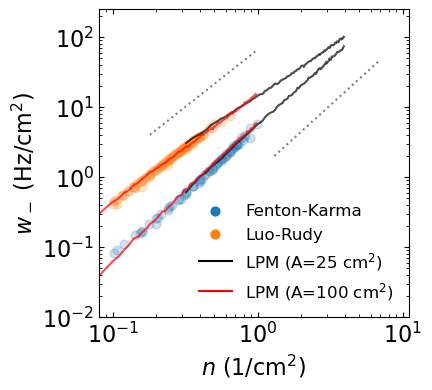

run_num_lst=[28, 29]
neighbor=1


In [242]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
x2lim=[0.01, 250]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim)

# Linear Particle (L=5)
df_fit_fk = dict_results_fk_lst[0]['df_fit'].copy()
dg_fit_fk = dict_results_fk_lst[0]['dg_fit'].copy()
df_fit_lr = dict_results_lr_lst[0]['df_fit'].copy()
dg_fit_lr = dict_results_lr_lst[0]['dg_fit'].copy()

if use_filterby_minN:
    df_fit_fk = df_fit_fk[df_fit_fk['N']>=minN].copy()
    df_fit_lr = df_fit_lr[df_fit_lr['N']>=minN].copy()

df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label=r'LPM (A=25 cm$^2$)')#r'Lin. (A=25 cm$^2$)')#f'Lin. Particle (L=5)')
df_fit_lr.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label='_Best Fit to LR')
# df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label=r'Particle (A=25 cm$^2$)')#f'Lin. Particle (L=5)')
# df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label=r'Linear Particle (A=25 cm$^2$)')#f'Lin. Particle (L=5)')
# df_fit_lr.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label='_Best Fit to LR')

# Linear Particle (L=10)
df_fit_fk = dict_results_fk_lst[1]['df_fit'].copy()
dg_fit_fk = dict_results_fk_lst[1]['dg_fit'].copy()
df_fit_lr = dict_results_lr_lst[1]['df_fit'].copy()
dg_fit_lr = dict_results_lr_lst[1]['dg_fit'].copy()

if use_filterby_minN:
    df_fit_fk = df_fit_fk[df_fit_fk['N']>=minN].copy()
    df_fit_lr = df_fit_lr[df_fit_lr['N']>=minN].copy()

   
df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=r'LPM (A=100 cm$^2$)')#r'Lin (A=100 cm$^2$)')#f'Lin. Particle (L=5)')
df_fit_lr.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label='_Best Fit to LR')
# df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=r'Linear Particle (A=100 cm$^2$)')#)f'Lin. Particle (L=10)')
# # df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=f'Linear Particle (L=10)')#,label='_Best Fit to FK')
# # df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=r'Lin. Particle (A=100 cm$^2$)')#)f'Lin. Particle (L=10)')
# # df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=r'Particle (A=100 cm$^2$)')#)f'Lin. Particle (L=10)')
# df_fit_lr.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label='_Best Fit to LR')

# format_plot
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'$n$ (1/cm$^2$)',ylabel=r'$w_-$ (Hz/cm$^2$)',fontsize=fontsize,use_loglog=True)
# format_plot(ax=ax,xlabel=r'$q$ (1/cm$^2$)',ylabel=r'$w_-$ (Hz/cm$^2$)',fontsize=fontsize,use_loglog=True)
# ax.legend(loc='upper left',fontsize=fontsize-2)
# ax.legend(loc='lower right',fontsize=fontsize-2.,frameon=False,ncol=2)
# leg = ax.legend(loc=(1.04,0.2),fontsize=fontsize-2.,frameon=False)
# leg = ax.legend(loc='upper left',fontsize=fontsize-3.,frameon=False,ncol=1)
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
leg = ax.legend(loc='lower right',fontsize=fontsize-4.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.get_legend().remove()


#mark the slope corresponding to the FK model
ax.plot(xlst_fk,ylst_fk,':',color='gray')
#mark the slope corresponding to the LR model
ax.plot(xlst_lr,ylst_lr,':',color='gray')
#TOOD(in .odg): annotate slope marker as $nu_-$

# x1lim = [8e-3, 1.1]  
# x2lim = [1e-2, 25]
# ax.set_xlim(x1lim)
# ax.set_ylim(x2lim)

#add annotation
# xytext=(0.09, 10)
# xytext=(0.01, 90)
# ax.annotate(r"best fit ($a>0$)", xy=xy, xytext=xytext,fontsize=fontsize)
# .tick_params(labelbottom=False, labeltop=True, labelleft=False, labelright=False,
#                      bottom=False, top=True, left=False, right=False)
# xytext=(0.01, 40)
# xy=(0.3, 11)
# ax.annotate(r"$a_{max}$ = const.", xy=xy, xytext=(0.01, 40),fontsize=fontsize-2)
# ax.annotate(r"$a_{max}$ fixed to observed", xy=xy, xytext=(0.01, 40),fontsize=fontsize-2)
# ax.annotate(r"$a_{max}$ fixed to observation"+f"\nfrom MSR of full", xy=xy, xytext=(0.01, 40),fontsize=fontsize-2)
# #add marker showing the slope of ~2
# annotation.slope_marker(origin=(.75, 2.0),
#                         slope=2,
#                         text_kwargs={'color': 'black','fontsize':16, 'alpha':0.7},
#                         poly_kwargs={'facecolor': (0.5, 0.5, 0.5), 'alpha':0.5},
#                         ax=ax)
plt.show()
print(f"{run_num_lst=}")
print(f"{neighbor=}")

$\nu_-$

In [243]:
dh_lst=[]
col_lst=['model','amax','L','varkappa','D','r','kappa',
           'rmse','log_likelihood','neighbor','mpe',
           'q_lo', 'q_hi','CollTime_lo', 'CollTime_hi','N_lo', 'N_hi',
          'run','cluster_index', 'job_index']

for dict_results_fk in dict_results_fk_lst:
    dg_fit_fk = dict_results_fk['dg_fit']
    dh_lst.append(dg_fit_fk[col_lst])
    #dg_fit_fk = dict_results_fk['dg_fit']
    #dh_lst.append(dg_fit_fk[col_lst])

for dict_results_lr in dict_results_lr_lst:
    dg_fit_lr = dict_results_lr['dg_fit']
    dh_lst.append(dg_fit_lr[col_lst])
    #dg_fit_lr = dict_results_lr['dg_fit']
    #dh_lst.append(dg_fit_lr[col_lst])
df_annihil_fits = pd.concat(dh_lst)
# df_annihil_fits.rese`t_index(inplace=True)
df_annihil_fits.sort_values(by=['model','L'],inplace=True)
# df_annihil_fits

In [244]:
# NOTE: if i can get r,kappa at L=10 to match r,kappa from L=5, then I can greatly shrink/simplify Table 1.
#DONE: constrain LR model to have D<0.5 for L=10

In [245]:
# annihil_fits_dir = f'/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fits.{run_num_lst[0]}.{run_num_lst[1]}.csv'
# annihil_fits_dir = f'/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fits.'
annihil_fits_dir = f'{nb_dir}/data/annihil_fits.'
for run_num in run_num_lst:
    annihil_fits_dir += f"{run_num}."
annihil_fits_dir+='csv'
print(f"{annihil_fits_dir=}")
#save as .csv and send to WJ right now!
# annihil_fits_dir = '/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fits.csv'
df_annihil_fits.to_csv(annihil_fits_dir,index=False)
print(df_annihil_fits)

annihil_fits_dir='/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fits.28.29.csv'
             model    amax     L  varkappa     D     r  kappa      rmse  \
4142  Fenton-Karma   1.780   5.0     1.080  0.35  0.12  200.0  0.056633   
2899  Fenton-Karma   1.780  10.0     1.080  0.35  0.12  250.0  0.184791   
2437      Luo-Rudy  10.147   5.0     9.747  0.20  0.12  200.0  0.404122   
3141      Luo-Rudy  10.147  10.0     9.447  0.35  0.20  200.0  0.174752   

      log_likelihood  neighbor       mpe  q_lo  q_hi  CollTime_lo  \
4142       37.621874       0.0  2.028843  0.32  3.92     0.000544   
2899      109.926507       1.0  5.927285  0.08  0.98     0.001715   
2437        7.881304       1.0  8.972176  0.32  3.92     0.000397   
3141       70.242963       1.0  5.750163  0.08  0.98     0.000655   

      CollTime_hi  N_lo   N_hi  run  cluster_index  job_index  
4142     0.065835  10.0  100.0   28       23387298       9508  
2899     0.260700  10.0  100.0   29       23453634     

In [246]:
print(f"Table of maximum likelihood fits of linear particle model to full models.")
# print(df_annihil_fits[['model','amax','L','rmse']])
print(df_annihil_fits[['model','amax','L','mpe']])

Table of maximum likelihood fits of linear particle model to full models.
             model    amax     L       mpe
4142  Fenton-Karma   1.780   5.0  2.028843
2899  Fenton-Karma   1.780  10.0  5.927285
2437      Luo-Rudy  10.147   5.0  8.972176
3141      Luo-Rudy  10.147  10.0  5.750163


In [247]:
print(f"Table of maximum likelihood fits of linear particle model to full models.")
print(df_annihil_fits[['model','amax','mpe','L','D','varkappa','r','kappa','neighbor']].T)

Table of maximum likelihood fits of linear particle model to full models.
                  4142          2899      2437      3141
model     Fenton-Karma  Fenton-Karma  Luo-Rudy  Luo-Rudy
amax              1.78          1.78    10.147    10.147
mpe           2.028843      5.927285  8.972176  5.750163
L                  5.0          10.0       5.0      10.0
D                 0.35          0.35       0.2      0.35
varkappa          1.08          1.08     9.747     9.447
r                 0.12          0.12      0.12       0.2
kappa            200.0         250.0     200.0     200.0
neighbor           0.0           1.0       1.0       1.0


In [248]:
print(f"Table of maximum likelihood fits of linear particle model to full models.")
# print(df_annihil_fits[['model','amax','L','rmse']])
print(df_annihil_fits[['model','amax','L','mpe']])

Table of maximum likelihood fits of linear particle model to full models.
             model    amax     L       mpe
4142  Fenton-Karma   1.780   5.0  2.028843
2899  Fenton-Karma   1.780  10.0  5.927285
2437      Luo-Rudy  10.147   5.0  8.972176
3141      Luo-Rudy  10.147  10.0  5.750163


In [249]:
#GOAL: compute mean percent error for table 1 instead of RMSE
#DONE: modify generation of df_defects_fk,lr to compute mean percent error where RMSE is computed
#DONE: compute MPE for annihilations
#DONE: compute MPE for msr
#DONE: modify print_fit_power_law to also print mean percent error

In [250]:
dfk = pd.concat([x['df_fit'][['N','L','CollTime','q','w']] for x in dict_results_fk_lst])
dfk['model_name']='Fenton-Karma'
dlr = pd.concat([x['df_fit'][['N','L','CollTime','q','w']] for x in dict_results_lr_lst])
dlr['model_name']='Luo-Rudy'
d=pd.concat([dfk,dlr])
directory = annihil_fits_dir.replace('fits','fitted_values')
d.reset_index().to_csv(directory)
directory

'/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fitted_values.28.29.csv'

# plot the corresponding best fits at L=5

In [283]:
# latest_run_num=29
# run_num_lst = list(reversed(list(np.arange(14,latest_run_num+1))))
# # run_num_lst=[25,17]
# # run_num_lst=[25,19]
# # run_num_lst=[25,24]
# # run_num_lst = list(np.arange(12,26))
# # run_num_lst = list(np.arange(26,14))
# run_num_lst=[25,18]
# # run_num_lst=[28,18]
# run_num_lst=[28,29]
# # run_num_lst=[25,29]
# # run_num_lst=[32,29]
# run_num_lst=[32,29]
# #note 31==30...
# # run_num_lst=[32,33]  
run_num_lst=[34,33]  

In [284]:
# run_num_lst=[34, 33]
# run_num_lst=[33,34]
# run_num_L10=37
# run_num_L10=36
# run_num_L10=35

# run_num_L10=30
# run_num_L10=31
# run_num_L10=32

run_num_L10=33
run_num_L5=34
# run_num_L5=35

# run_num_L10=29
# run_num_L5=28


#heretimheretim
run_num_lst=[run_num_L10,run_num_L5]

In [296]:
use_filterby_neighbor=False
use_filterby_neighbor=True
neighbor=0
# neighbor=1

use_filterby_minN=True
# use_filterby_minN=False
minN=9
# minN=20
minN=50
# minN=70
# minN=90
use_filterby_amax=True
min_amax=1.

use_select_rxn=True
use_select_rxn=False
# r_trgt_lr=0.195
# kappa_trgt_lr=200
# r_trgt_fk=0.135
# kappa_trgt_fk=167.02
# kappa_trgt_fk=200
r_trgt_lr=0.155
kappa_trgt_lr=300
r_trgt_fk=0.135
kappa_trgt_fk=167.02

use_filterby_r=True
# use_filterby_r=False
# rinf=0.195 #cm
# rinf=0.15 #cm
rinf=0. #cm
# rinf=0.1 #cm
# rsupa=0.15 #cm
rsupa=0.5 #cm


# neighbor=1
remove_no_diffusion=True
use_filterby_D=True
Dinf=0.1 #cm^2/s
Dsupa=0.5 #cm^2/s
# Dinf=0
# Dinf=0.01
# run_num=25 #L=5 cm
# run_num=18 #L=10 cm
num_digits_round_amax=3
gmin_fk_lst=[]
gmin_lr_lst=[]
log_dir_fk_lst=[]
log_dir_lr_lst=[]
dict_results_fk_lst=[]
dict_results_lr_lst=[]
# for run_num in [25,18]: #chosen exemplar pair
# for run_num in run_num_lst:
run_num=run_num_L10
parquet_dir_defects_fk=f'{nb_dir}/data/osg_output/run_{run_num}_defects_to_fk.parquet'
parquet_dir_defects_lr=f'{nb_dir}/data/osg_output/run_{run_num}_defects_to_lr.parquet'
input_folder=f'{nb_dir}/data/osg_output/run_{run_num}_all'
#     parquet_dir_defects_fk=f'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_defects_to_fk.parquet'
#     parquet_dir_defects_lr=f'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_defects_to_lr.parquet'
#     input_folder=f'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_all'
#load data
df_defects_fk=pd.read_parquet(parquet_dir_defects_fk)
df_defects_lr=pd.read_parquet(parquet_dir_defects_lr)

#filterby neighbor
if use_filterby_neighbor:
    df_defects_fk = df_defects_fk[df_defects_fk['neighbor']==neighbor].copy()
    df_defects_lr = df_defects_lr[df_defects_lr['neighbor']==neighbor].copy()

#compute order parameter for each member a=amax-2*D
#add columns for amax
df_defects_fk['amax'] = np.around(df_defects_fk['varkappa'] + 2.*df_defects_fk['D'],num_digits_round_amax)
df_defects_lr['amax'] = np.around(df_defects_lr['varkappa'] + 2.*df_defects_lr['D'],num_digits_round_amax)

if remove_no_diffusion:
    df_defects_fk = df_defects_fk[df_defects_fk['D']>Dinf].copy()
    df_defects_lr = df_defects_lr[df_defects_lr['D']>Dinf].copy()


if use_filterby_D:
    df_defects_fk = df_defects_fk[df_defects_fk['D']<Dsupa].copy()
    df_defects_lr = df_defects_lr[df_defects_lr['D']<Dsupa].copy()

if use_filterby_r:
    df_defects_fk = df_defects_fk[(df_defects_fk['r']>=rinf)&(df_defects_fk['r']<rsupa)].copy()
    df_defects_lr = df_defects_lr[(df_defects_lr['r']>=rinf)&(df_defects_lr['r']<rsupa)].copy()


if use_filterby_amax:
    df_defects_fk = df_defects_fk[df_defects_fk['amax']>min_amax].copy()
    df_defects_lr = df_defects_lr[df_defects_lr['amax']>min_amax].copy()

if use_select_rxn:
    df_defects_lr = df_defects_lr[
        (df_defects_lr['r']==r_trgt_lr)&
        (df_defects_lr['kappa']==kappa_trgt_lr)
    ].copy()
    df_defects_fk = df_defects_fk[
        (df_defects_fk['r']==r_trgt_fk)&
        (df_defects_fk['kappa']==kappa_trgt_fk)
    ].copy()
    # r_trgt_lr=0.155
    # kappa_trgt_lr=300

#identify the lowest error simulation for each amax value
print(f"\n**************************************")
print(f"* Fenton-Karma Model (best settings):")
print(f"**************************************")
minrmse=9999.
#supamax=40.
supamax=1.8
#supamax=40.
for amax,g in df_defects_fk.groupby(by='amax'):
    rmse_min = g['rmse'].min()
    count = g['rmse'].count()
    log_likelihood = g['log_likelihood'].max()
    if (rmse_min<=minrmse)&(amax<=supamax):
        minrmse=rmse_min
        gmin_fk=g.copy()
        print_str =f"{amax=:.4f}, {rmse_min=:.4f}, {log_likelihood=:.4f}, {count=}"
print(print_str)
gmin_fk.sort_values(by='D',inplace=True)


#find best simulation for the full model at this avalue
#     dg_fk=gmin_fk[gmin_fk['rmse'] == gmin_fk['rmse'].min()].copy()
dg_fk=gmin_fk[gmin_fk['log_likelihood'] == gmin_fk['log_likelihood'].max()].copy()
dg_fk['run']=run_num
df_defects_fk['run']=run_num
dg_fk['model']='Fenton-Karma'
cluster_index,job_index = dg_fk[['cluster_index','job_index']].values.T
input_fn = os.path.join(input_folder,f"job.out.{int(cluster_index)}.{int(job_index)}")
#assert os.path.exists(input_fn)
if os.path.exists(input_fn):
    input_fn_fk=input_fn
    df_fit_fk,dict_linear_fit_fk = routine_measure_annihilation_defect(input_fn,printing=True,**kwargs)
    amax_fk=dg_fk['amax'].median()
    rmse_fk=dg_fk['rmse'].median()
    L = dg_fk['L'].median()
    print(f"\nbest fit for Fenton-Karma: RMSE: {rmse_fk:.4f} Hz/cm^2, amax: {amax_fk:.4f} cm^2/s, L: {L} cm")
    print(f"{input_fn_fk=}")
    #record
    dict_results_fk=dict(
        model_name='Fenton-Karma',
        amax=amax_fk,
        rmse=rmse_fk,
        L=L,
        df_fit=df_fit_fk,
        dg_fit=dg_fk,
        dict_linear_fit=dict_linear_fit_fk,
        filename=input_fn_fk,
        gmin=gmin_fk)
    dict_results_fk_lst.append(dict_results_fk)
    gmin_fk_lst.append(gmin_fk)
    log_dir_fk_lst.append(input_fn)

#identify the lowest error simulation for each amax value
print(f"\n**************************************")
print(f"* Luo-Rudy Model (best settings):")
print(f"**************************************")
minrmse=9999.
#supamax=40
supamax=10.2
infamax=10
for amax,g in df_defects_lr.groupby(by='amax'):
    rmse_min = g['rmse'].min()
    count = g['rmse'].count()
    log_likelihood = g['log_likelihood'].max()
    #if (rmse_min<=minrmse)&(amax<=supamax):
    if (rmse_min<=minrmse)&(amax<=supamax)&(amax>infamax):
        minrmse=rmse_min
        gmin_lr=g.copy()
        print_str =f"{amax=:.4f}, {rmse_min=:.4f}, {log_likelihood=:.4f}, {count=}"
print(print_str)        
gmin_lr.sort_values(by='D',inplace=True)

#find best simulation for the full model at this avalue
#     dg_lr=gmin_lr[gmin_lr['rmse'] == gmin_lr['rmse'].min()].copy()
dg_lr=gmin_lr[gmin_lr['log_likelihood'] == gmin_lr['log_likelihood'].max()].copy()
dg_lr['run']=run_num
df_defects_lr['run']=run_num
dg_lr['model']='Luo-Rudy'
cluster_index,job_index = dg_lr[['cluster_index','job_index']].values.T
input_fn = os.path.join(input_folder,f"job.out.{int(cluster_index)}.{int(job_index)}")
#assert os.path.exists(input_fn)
if os.path.exists(input_fn):
    input_fn_lr=input_fn
    df_fit_lr,dict_linear_fit_lr = routine_measure_annihilation_defect(input_fn,printing=True,**kwargs)
    amax_lr=dg_lr['amax'].median()
    rmse_lr=dg_lr['rmse'].median()
    L = dg_lr['L'].median()
    print(f"\nbest fit for Luo-Rudy: RMSE: {rmse_lr:.4f} Hz/cm^2, amax: {amax_lr:.4f} cm^2/s, L: {L} cm")
    print(f"{input_fn_lr=}")
    #record
    dict_results_lr=dict(
        model_name='Luo-Rudy',
        amax=amax_lr,
        rmse=rmse_lr,
        L=L,
        df_fit=df_fit_lr,
        dg_fit=dg_lr,
        dict_linear_fit=dict_linear_fit_lr,
        filename=input_fn_lr,
        gmin=gmin_lr)
    dict_results_lr_lst.append(dict_results_lr)
    gmin_lr_lst.append(gmin_lr)
    log_dir_lr_lst.append(input_fn)

#print(f"\nparameter range supported in run #{run_num}:")
print(f"number of trials: {df_defects_lr.shape[0]}")
#print(df_defects_lr.describe()[['r','kappa','D','varkappa','amax','L','neighbor']].T[['min','max']].T)


**************************************
* Fenton-Karma Model (best settings):
**************************************
amax=1.7810, rmse_min=0.1113, log_likelihood=79.5071, count=745

best fit for Fenton-Karma: RMSE: 0.1841 Hz/cm^2, amax: 1.7810 cm^2/s, L: 10.0 cm
input_fn_fk='/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_33_all/job.out.24419143.25716'

**************************************
* Luo-Rudy Model (best settings):
**************************************
amax=10.1470, rmse_min=0.1516, log_likelihood=78.7399, count=757

best fit for Luo-Rudy: RMSE: 0.1516 Hz/cm^2, amax: 10.1470 cm^2/s, L: 10.0 cm
input_fn_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_33_all/job.out.24419143.20423'
number of trials: 6785


In [297]:
use_select_rxn=True
# use_select_rxn=False
# r_trgt_lr=0.195
# kappa_trgt_lr=200
# r_trgt_fk=0.135
# kappa_trgt_fk=167.02
# kappa_trgt_fk=200
# r_trgt_lr=0.155
# kappa_trgt_lr=300
# r_trgt_fk=0.135
# kappa_trgt_fk=167.02
r_trgt_lr=dg_lr['r'].values[0]
kappa_trgt_lr=dg_lr['kappa'].values[0]
r_trgt_fk=dg_fk['r'].values[0]
kappa_trgt_fk=dg_fk['kappa'].values[0]

In [298]:
run_num=run_num_L5
parquet_dir_defects_fk=f'{nb_dir}/data/osg_output/run_{run_num}_defects_to_fk.parquet'
parquet_dir_defects_lr=f'{nb_dir}/data/osg_output/run_{run_num}_defects_to_lr.parquet'
input_folder=f'{nb_dir}/data/osg_output/run_{run_num}_all'
#     parquet_dir_defects_fk=f'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_defects_to_fk.parquet'
#     parquet_dir_defects_lr=f'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_defects_to_lr.parquet'
#     input_folder=f'/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_{run_num}_all'
#load data
df_defects_fk=pd.read_parquet(parquet_dir_defects_fk)
df_defects_lr=pd.read_parquet(parquet_dir_defects_lr)

#filterby neighbor
if use_filterby_neighbor:
    df_defects_fk = df_defects_fk[df_defects_fk['neighbor']==neighbor].copy()
    df_defects_lr = df_defects_lr[df_defects_lr['neighbor']==neighbor].copy()

#compute order parameter for each member a=amax-2*D
#add columns for amax
df_defects_fk['amax'] = np.around(df_defects_fk['varkappa'] + 2.*df_defects_fk['D'],num_digits_round_amax)
df_defects_lr['amax'] = np.around(df_defects_lr['varkappa'] + 2.*df_defects_lr['D'],num_digits_round_amax)

if remove_no_diffusion:
    df_defects_fk = df_defects_fk[df_defects_fk['D']>Dinf].copy()
    df_defects_lr = df_defects_lr[df_defects_lr['D']>Dinf].copy()


if use_filterby_D:
    df_defects_fk = df_defects_fk[df_defects_fk['D']<Dsupa].copy()
    df_defects_lr = df_defects_lr[df_defects_lr['D']<Dsupa].copy()

if use_filterby_r:
    df_defects_fk = df_defects_fk[(df_defects_fk['r']>=rinf)&(df_defects_fk['r']<rsupa)].copy()
    df_defects_lr = df_defects_lr[(df_defects_lr['r']>=rinf)&(df_defects_lr['r']<rsupa)].copy()


if use_filterby_amax:
    df_defects_fk = df_defects_fk[df_defects_fk['amax']>min_amax].copy()
    df_defects_lr = df_defects_lr[df_defects_lr['amax']>min_amax].copy()

if use_select_rxn:
    df_defects_lr = df_defects_lr[
        (df_defects_lr['r']==r_trgt_lr)&
        (df_defects_lr['kappa']==kappa_trgt_lr)
    ].copy()
    df_defects_fk = df_defects_fk[
        (df_defects_fk['r']==r_trgt_fk)&
        (df_defects_fk['kappa']==kappa_trgt_fk)
    ].copy()
    # r_trgt_lr=0.155
    # kappa_trgt_lr=300

#identify the lowest error simulation for each amax value
print(f"\n**************************************")
print(f"* Fenton-Karma Model (best settings):")
print(f"**************************************")
minrmse=9999.
#supamax=40.
supamax=1.8
#supamax=40.
for amax,g in df_defects_fk.groupby(by='amax'):
    rmse_min = g['rmse'].min()
    count = g['rmse'].count()
    log_likelihood = g['log_likelihood'].max()
    if (rmse_min<=minrmse)&(amax<=supamax):
        minrmse=rmse_min
        gmin_fk=g.copy()
        print_str =f"{amax=:.4f}, {rmse_min=:.4f}, {log_likelihood=:.4f}, {count=}"
print(print_str)
gmin_fk.sort_values(by='D',inplace=True)


#find best simulation for the full model at this avalue
#     dg_fk=gmin_fk[gmin_fk['rmse'] == gmin_fk['rmse'].min()].copy()
dg_fk=gmin_fk[gmin_fk['log_likelihood'] == gmin_fk['log_likelihood'].max()].copy()
dg_fk['run']=run_num
df_defects_fk['run']=run_num
dg_fk['model']='Fenton-Karma'
cluster_index,job_index = dg_fk[['cluster_index','job_index']].values.T
input_fn = os.path.join(input_folder,f"job.out.{int(cluster_index)}.{int(job_index)}")
#assert os.path.exists(input_fn)
if os.path.exists(input_fn):
    input_fn_fk=input_fn
    df_fit_fk,dict_linear_fit_fk = routine_measure_annihilation_defect(input_fn,printing=True,**kwargs)
    amax_fk=dg_fk['amax'].median()
    rmse_fk=dg_fk['rmse'].median()
    L = dg_fk['L'].median()
    print(f"\nbest fit for Fenton-Karma: RMSE: {rmse_fk:.4f} Hz/cm^2, amax: {amax_fk:.4f} cm^2/s, L: {L} cm")
    print(f"{input_fn_fk=}")
    #record
    dict_results_fk=dict(
        model_name='Fenton-Karma',
        amax=amax_fk,
        rmse=rmse_fk,
        L=L,
        df_fit=df_fit_fk,
        dg_fit=dg_fk,
        dict_linear_fit=dict_linear_fit_fk,
        filename=input_fn_fk,
        gmin=gmin_fk)
    dict_results_fk_lst.append(dict_results_fk)
    gmin_fk_lst.append(gmin_fk)
    log_dir_fk_lst.append(input_fn)
else:
    print(f"warning 404: file not found: {input_fn}")

#identify the lowest error simulation for each amax value
print(f"\n**************************************")
print(f"* Luo-Rudy Model (best settings):")
print(f"**************************************")
minrmse=9999.
#supamax=40
supamax=10.2
infamax=10
for amax,g in df_defects_lr.groupby(by='amax'):
    rmse_min = g['rmse'].min()
    count = g['rmse'].count()
    log_likelihood = g['log_likelihood'].max()
    #if (rmse_min<=minrmse)&(amax<=supamax):
    if (rmse_min<=minrmse)&(amax<=supamax)&(amax>infamax):
        minrmse=rmse_min
        gmin_lr=g.copy()
        print_str =f"{amax=:.4f}, {rmse_min=:.4f}, {log_likelihood=:.4f}, {count=}"
print(print_str)        
gmin_lr.sort_values(by='D',inplace=True)

#find best simulation for the full model at this avalue
#     dg_lr=gmin_lr[gmin_lr['rmse'] == gmin_lr['rmse'].min()].copy()
dg_lr=gmin_lr[gmin_lr['log_likelihood'] == gmin_lr['log_likelihood'].max()].copy()
dg_lr['run']=run_num
df_defects_lr['run']=run_num
dg_lr['model']='Luo-Rudy'
cluster_index,job_index = dg_lr[['cluster_index','job_index']].values.T
input_fn = os.path.join(input_folder,f"job.out.{int(cluster_index)}.{int(job_index)}")
#assert os.path.exists(input_fn)
if os.path.exists(input_fn):
    input_fn_lr=input_fn
    df_fit_lr,dict_linear_fit_lr = routine_measure_annihilation_defect(input_fn,printing=True,**kwargs)
    amax_lr=dg_lr['amax'].median()
    rmse_lr=dg_lr['rmse'].median()
    L = dg_lr['L'].median()
    print(f"\nbest fit for Luo-Rudy: RMSE: {rmse_lr:.4f} Hz/cm^2, amax: {amax_lr:.4f} cm^2/s, L: {L} cm")
    print(f"{input_fn_lr=}")
    #record
    dict_results_lr=dict(
        model_name='Luo-Rudy',
        amax=amax_lr,
        rmse=rmse_lr,
        L=L,
        df_fit=df_fit_lr,
        dg_fit=dg_lr,
        dict_linear_fit=dict_linear_fit_lr,
        filename=input_fn_lr,
        gmin=gmin_lr)
    dict_results_lr_lst.append(dict_results_lr)
    gmin_lr_lst.append(gmin_lr)
    log_dir_lr_lst.append(input_fn)

#print(f"\nparameter range supported in run #{run_num}:")
print(f"number of trials: {df_defects_lr.shape[0]}")
#print(df_defects_lr.describe()[['r','kappa','D','varkappa','amax','L','neighbor']].T[['min','max']].T)


**************************************
* Fenton-Karma Model (best settings):
**************************************
amax=10.1470, rmse_min=0.1516, log_likelihood=78.7399, count=757
warning 404: file not found: /home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_34_all/job.out.24419143.25716

**************************************
* Luo-Rudy Model (best settings):
**************************************
amax=10.1470, rmse_min=1.9101, log_likelihood=-2.1760, count=1

best fit for Luo-Rudy: RMSE: 1.9101 Hz/cm^2, amax: 10.1470 cm^2/s, L: 5.0 cm
input_fn_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/osg_output/run_34_all/job.out.30282466.427'
number of trials: 4


In [299]:
len(dict_results_fk_lst),len(dict_results_lr_lst)

(1, 2)

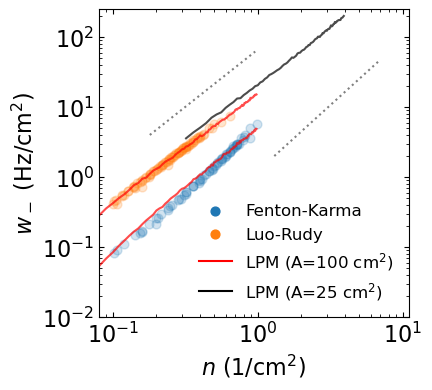

run_num_lst=[33, 34]
neighbor=0


In [300]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
x2lim=[0.01, 250]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim)

# Linear Particle (L=5)
df_fit_fk = dict_results_fk_lst[0]['df_fit'].copy()
dg_fit_fk = dict_results_fk_lst[0]['dg_fit'].copy()
df_fit_lr = dict_results_lr_lst[0]['df_fit'].copy()
dg_fit_lr = dict_results_lr_lst[0]['dg_fit'].copy()

if use_filterby_minN:
    df_fit_fk = df_fit_fk[df_fit_fk['N']>=minN].copy()
    df_fit_lr = df_fit_lr[df_fit_lr['N']>=minN].copy()

df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=r'LPM (A=100 cm$^2$)')#r'Lin. (A=25 cm$^2$)')#f'Lin. Particle (L=5)')
df_fit_lr.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label='_Best Fit to LR')
# df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label=r'Particle (A=25 cm$^2$)')#f'Lin. Particle (L=5)')
# df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label=r'Linear Particle (A=25 cm$^2$)')#f'Lin. Particle (L=5)')
# df_fit_lr.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label='_Best Fit to LR')

# Linear Particle (L=10)
try:
    df_fit_fk = dict_results_fk_lst[1]['df_fit'].copy()
    dg_fit_fk = dict_results_fk_lst[1]['dg_fit'].copy()
    if use_filterby_minN:
        df_fit_fk = df_fit_fk[df_fit_fk['N']>=minN].copy()
    df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label=r'_LPM (A=25 cm$^2$)')#r'Lin (A=100 cm$^2$)')#f'Lin. Particle (L=5)')
except IndexError as e:
    pass
try:
    df_fit_lr = dict_results_lr_lst[1]['df_fit'].copy()
    dg_fit_lr = dict_results_lr_lst[1]['dg_fit'].copy()
    if use_filterby_minN:
        df_fit_lr = df_fit_lr[df_fit_lr['N']>=minN].copy()
    df_fit_lr.plot(x='q',y='w',alpha=0.7,ax=ax,color='k',label=r'LPM (A=25 cm$^2$)')#r'Lin (A=100 cm$^2$)')#f'Lin. Particle (L=5)')
except IndexError as e:
    pass
# df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=r'LPM (A=100 cm$^2$)')#r'Lin (A=100 cm$^2$)')#f'Lin. Particle (L=5)')
# df_fit_lr.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label='_Best Fit to LR')
# df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=r'Linear Particle (A=100 cm$^2$)')#)f'Lin. Particle (L=10)')
# # df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=f'Linear Particle (L=10)')#,label='_Best Fit to FK')
# # df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=r'Lin. Particle (A=100 cm$^2$)')#)f'Lin. Particle (L=10)')
# # df_fit_fk.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label=r'Particle (A=100 cm$^2$)')#)f'Lin. Particle (L=10)')
# df_fit_lr.plot(x='q',y='w',alpha=0.7,ax=ax,color='r',label='_Best Fit to LR')

# format_plot
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'$n$ (1/cm$^2$)',ylabel=r'$w_-$ (Hz/cm$^2$)',fontsize=fontsize,use_loglog=True)
# format_plot(ax=ax,xlabel=r'$q$ (1/cm$^2$)',ylabel=r'$w_-$ (Hz/cm$^2$)',fontsize=fontsize,use_loglog=True)
# ax.legend(loc='upper left',fontsize=fontsize-2)
# ax.legend(loc='lower right',fontsize=fontsize-2.,frameon=False,ncol=2)
# leg = ax.legend(loc=(1.04,0.2),fontsize=fontsize-2.,frameon=False)
# leg = ax.legend(loc='upper left',fontsize=fontsize-3.,frameon=False,ncol=1)
# leg = ax.legend(loc='lower right',fontsize=fontsize-3.,frameon=False,ncol=1)
leg = ax.legend(loc='lower right',fontsize=fontsize-4.,frameon=False,ncol=1)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
# ax.get_legend().remove()


#mark the slope corresponding to the FK model
ax.plot(xlst_fk,ylst_fk,':',color='gray')
#mark the slope corresponding to the LR model
ax.plot(xlst_lr,ylst_lr,':',color='gray')
#TOOD(in .odg): annotate slope marker as $nu_-$

# x1lim = [8e-3, 1.1]  
# x2lim = [1e-2, 25]
# ax.set_xlim(x1lim)
# ax.set_ylim(x2lim)

#add annotation
# xytext=(0.09, 10)
# xytext=(0.01, 90)
# ax.annotate(r"best fit ($a>0$)", xy=xy, xytext=xytext,fontsize=fontsize)
# .tick_params(labelbottom=False, labeltop=True, labelleft=False, labelright=False,
#                      bottom=False, top=True, left=False, right=False)
# xytext=(0.01, 40)
# xy=(0.3, 11)
# ax.annotate(r"$a_{max}$ = const.", xy=xy, xytext=(0.01, 40),fontsize=fontsize-2)
# ax.annotate(r"$a_{max}$ fixed to observed", xy=xy, xytext=(0.01, 40),fontsize=fontsize-2)
# ax.annotate(r"$a_{max}$ fixed to observation"+f"\nfrom MSR of full", xy=xy, xytext=(0.01, 40),fontsize=fontsize-2)
# #add marker showing the slope of ~2
# annotation.slope_marker(origin=(.75, 2.0),
#                         slope=2,
#                         text_kwargs={'color': 'black','fontsize':16, 'alpha':0.7},
#                         poly_kwargs={'facecolor': (0.5, 0.5, 0.5), 'alpha':0.5},
#                         ax=ax)
plt.show()
print(f"{run_num_lst=}")
print(f"{neighbor=}")

In [301]:
dh_lst=[]
col_lst=['model','amax','L','varkappa','D','r','kappa',
           'rmse','log_likelihood','neighbor','mpe',
           'q_lo', 'q_hi','CollTime_lo', 'CollTime_hi','N_lo', 'N_hi',
          'run','cluster_index', 'job_index']

for dict_results_fk in dict_results_fk_lst:
    dg_fit_fk = dict_results_fk['dg_fit']
    dh_lst.append(dg_fit_fk[col_lst])
    #dg_fit_fk = dict_results_fk['dg_fit']
    #dh_lst.append(dg_fit_fk[col_lst])

for dict_results_lr in dict_results_lr_lst:
    dg_fit_lr = dict_results_lr['dg_fit']
    dh_lst.append(dg_fit_lr[col_lst])
    #dg_fit_lr = dict_results_lr['dg_fit']
    #dh_lst.append(dg_fit_lr[col_lst])
df_annihil_fits = pd.concat(dh_lst)
# df_annihil_fits.rese`t_index(inplace=True)
df_annihil_fits.sort_values(by=['model','L'],inplace=True)
# df_annihil_fits
# annihil_fits_dir = f'/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fits.{run_num_lst[0]}.{run_num_lst[1]}.csv'
# annihil_fits_dir = f'/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fits.'
annihil_fits_dir = f'{nb_dir}/data/annihil_fits.'
for run_num in run_num_lst:
    annihil_fits_dir += f"{run_num}."
annihil_fits_dir+='csv'
print(f"{annihil_fits_dir=}")
#save as .csv and send to WJ right now!
# annihil_fits_dir = '/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fits.csv'
df_annihil_fits.to_csv(annihil_fits_dir,index=False)
print(df_annihil_fits)
dfk = pd.concat([x['df_fit'][['N','L','CollTime','q','w']] for x in dict_results_fk_lst])
dfk['model_name']='Fenton-Karma'
dlr = pd.concat([x['df_fit'][['N','L','CollTime','q','w']] for x in dict_results_lr_lst])
dlr['model_name']='Luo-Rudy'
d=pd.concat([dfk,dlr])
directory = annihil_fits_dir.replace('fits','fitted_values')
d.reset_index().to_csv(directory)
directory

annihil_fits_dir='/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fits.33.34.csv'
              model    amax     L  varkappa       D      r   kappa      rmse  \
5665   Fenton-Karma   1.781  10.0    1.5520  0.1145  0.120  167.02  0.184123   
1692       Luo-Rudy  10.147   5.0    9.3154  0.4158  0.195  200.00  1.910054   
14481      Luo-Rudy  10.147  10.0    9.3154  0.4158  0.195  200.00  0.151564   

       log_likelihood  neighbor        mpe  q_lo  q_hi  CollTime_lo  \
5665        79.507113       0.0   8.761196  0.08  0.98     0.002028   
1692        -2.175992       0.0  36.021223  0.32  3.92     0.000200   
14481       78.739936       0.0   5.134366  0.08  0.98     0.000661   

       CollTime_hi  N_lo   N_hi  run  cluster_index  job_index  
5665      0.187993  10.0  100.0   33       24419143      25716  
1692      0.011174  10.0  100.0   34       30282466        427  
14481     0.035616  10.0  100.0   33       24419143      20423  


'/home/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fitted_values.33.34.csv'

In [ ]:
#TODO: dev next run on L=5
#TODO: run it for only the measured a,D values in Table 1
#TODO: make it really dense in r,kappa
#ranges r longer than 0.1 - 0.5
#rates kappa larger than 100 in steps of 5 up to 500 or 1000
#TODO: compute both neighbor=0,1